# Import Libraries

In [4]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image

# Load Dataset

In [5]:
# Dataset path
dataset_dir = '../data/processed/'

# Sets
train_dir = f'{dataset_dir}/train'

# Labels
df = pd.read_csv(f'{train_dir}/labels.csv')
df_labels = df.drop(columns=['filename'])   # drop filename
df_labels.columns = df_labels.columns.str[1:] # Remove leading whitespace

# Images
images_dir = f'{train_dir}/images'

# Summary

List of classes

In [6]:
print(df_labels.columns)

Index(['angry', 'ears_flat', 'ears_up', 'eyes_large_pupils', 'eyes_narrowed',
       'eyes_small_pupils', 'happy', 'mouth_fangs', 'neutral',
       'posture_arched_back', 'posture_exposed_belly', 'posture_neutral',
       'posture_small', 'posture_stretch', 'scared', 'tail_neutral',
       'tail_tucked', 'tail_up'],
      dtype='object')


Number of classes and images

In [7]:
# Number of classes
num_classes = len(df.columns) - 1 # exclude filename

# Number of images
num_images = len(df)

print('Number of classes:', num_classes)
print('Number of images:', num_images)

Number of classes: 18
Number of images: 5916


# Class Analysis

Frequency of labels

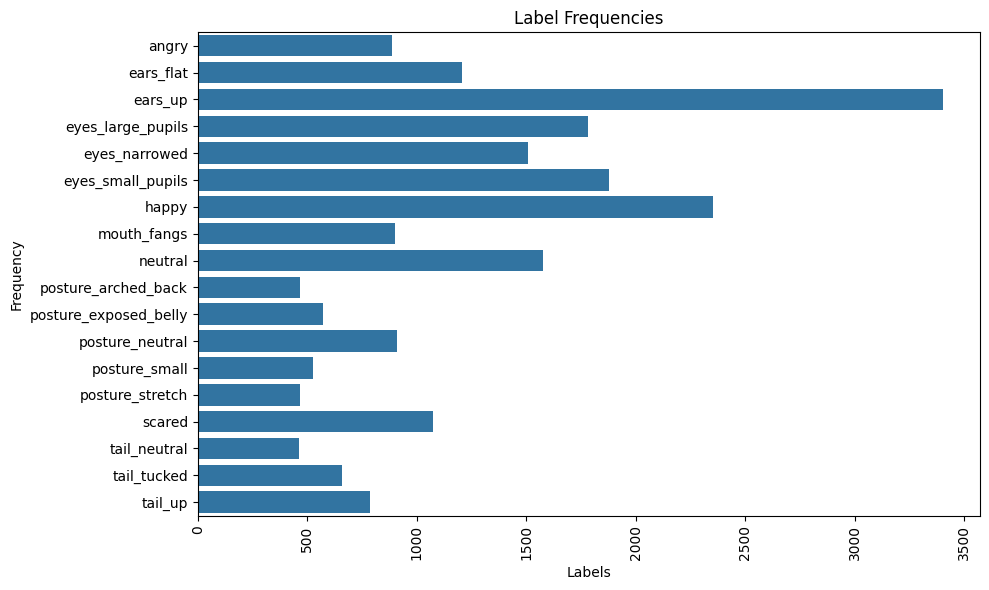

In [8]:
label_frequencies = df_labels.sum() # sum label frequency

# Plot distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_frequencies.values, y=label_frequencies.index, orient='h')
plt.xticks(rotation=90)
plt.title('Label Frequencies')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.tight_layout()

plt.show()

Class co-occurrence

<Axes: >

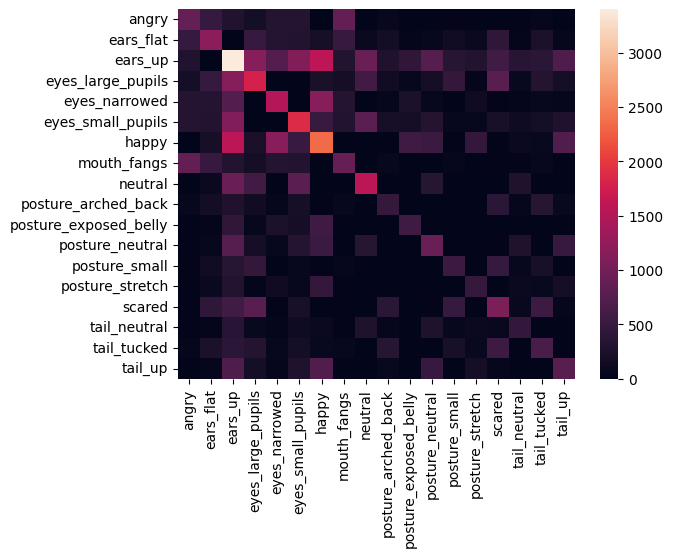

In [9]:
coocc_matrix = df_labels.T.dot(df_labels)
sns.heatmap(coocc_matrix)

<Axes: >

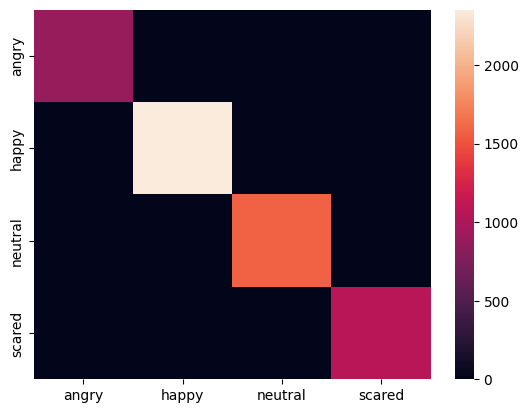

In [10]:
df_emotions = df_labels[['angry', 'happy', 'neutral', 'scared']]
coocc_emotions = df_emotions.T.dot(df_emotions)
sns.heatmap(coocc_emotions)

<Axes: >

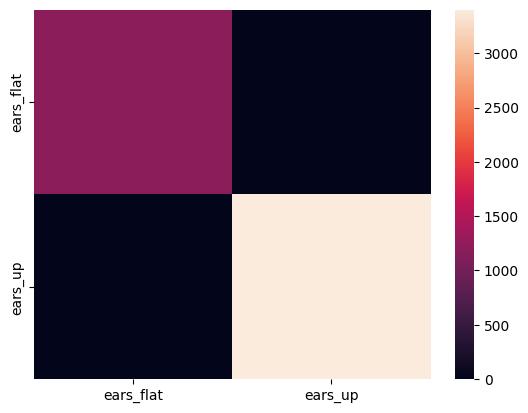

In [11]:
df_ears = df_labels[['ears_flat', 'ears_up']]
coocc_ears = df_ears.T.dot(df_ears)
sns.heatmap(coocc_ears)

<Axes: >

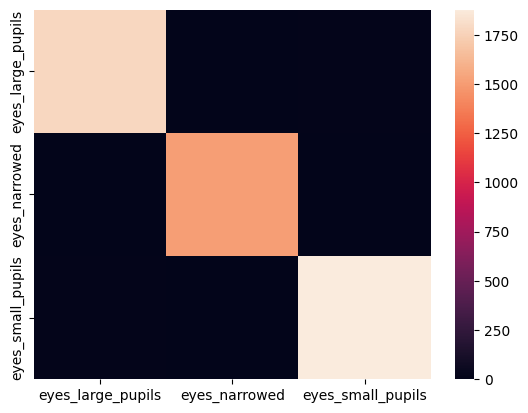

In [12]:
df_eyes = df_labels[['eyes_large_pupils', 'eyes_narrowed', 'eyes_small_pupils']]
coocc_eyes = df_eyes.T.dot(df_eyes)
sns.heatmap(coocc_eyes)

<Axes: >

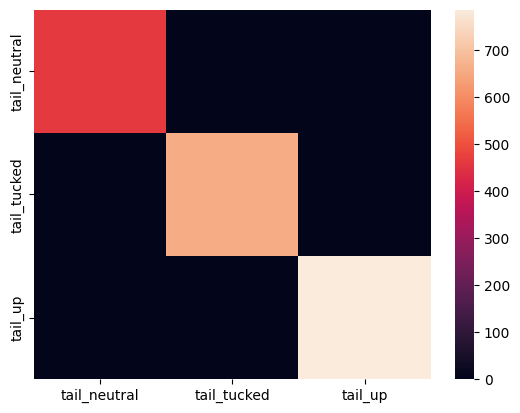

In [13]:
df_tail = df_labels[['tail_neutral', 'tail_tucked', 'tail_up']]
coocc_tail = df_tail.T.dot(df_tail)
sns.heatmap(coocc_tail)

<Axes: >

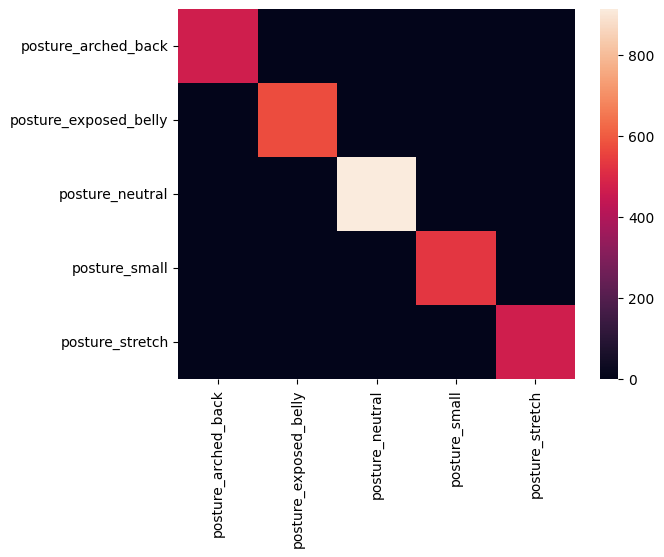

In [14]:
df_posture = df_labels[['posture_arched_back', 'posture_exposed_belly', 'posture_neutral', 'posture_small', 'posture_stretch']]
coocc_posture = df_posture.T.dot(df_posture)
sns.heatmap(coocc_posture)

# Image Analysis

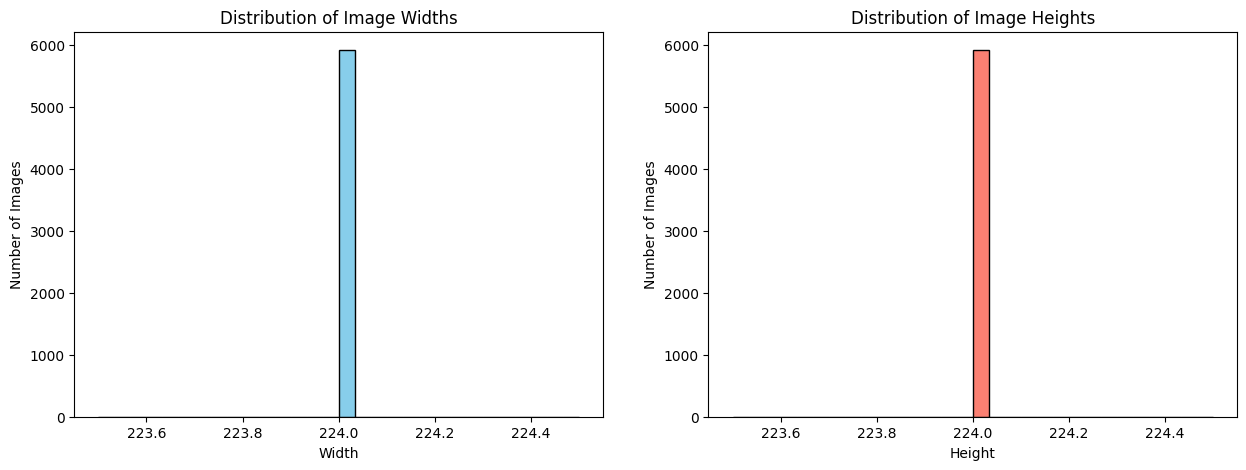

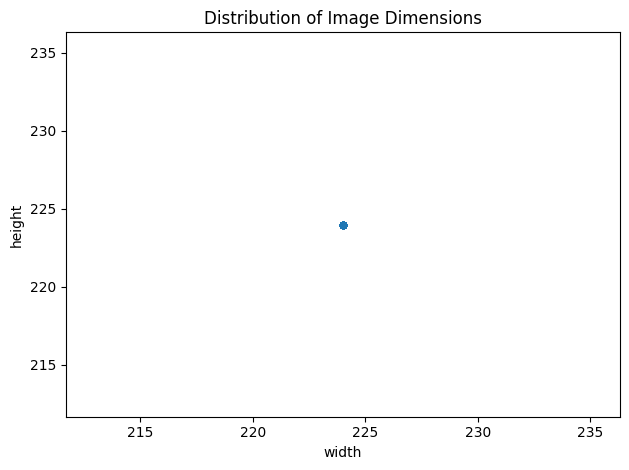

In [16]:
# Get list of all image filenames
img_files = os.listdir(images_dir)

# Extract dimension of all images
img_dims = [Image.open(os.path.join(images_dir, img_file)).size for img_file in img_files]

# Separate widths and heights
widths = [dim[0] for dim in img_dims]
heights = [dim[1] for dim in img_dims]

# Create dataframe
df_img_sizes = pd.DataFrame({'width': widths, 'height': heights})

# Plotting distribution of widths and heights
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting widths
ax[0].hist(widths, bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('Distribution of Image Widths')
ax[0].set_xlabel("Width")
ax[0].set_ylabel('Number of Images')
# Plotting heights
ax[1].hist(heights, bins=30, color='salmon', edgecolor='black')
ax[1].set_title('Distribution of Image Heights')
ax[1].set_xlabel("Height")
ax[1].set_ylabel('Number of Images')

# Scatter plot of dimensions
df_img_sizes.plot.scatter(x='width', y='height')
plt.title('Distribution of Image Dimensions')

plt.tight_layout()
plt.show()